In [1]:
from PIL import Image
import matplotlib.pyplot as plot

In [5]:
# Get Images' Path
import os
import numpy as np


root_path = os.getcwd()
mask_path = root_path+'/test_imgs/mask.png'
foreground_path = root_path+'/test_imgs/foreground.jpg'
background_path = root_path+'/test_imgs/background.jpg'

In [ ]:
# Image pixels
mask_img = Image.open(mask_path)
background_img = Image.open(background_path)
foreground_img = Image.open(foreground_path)
#a = mask_img.convert('RGB')
#print(type(a))
mask_pixels = mask_img.load()
foreground_pixels = foreground_img.load()
background_pixels = background_img.load()

<class 'PIL.Image.Image'>


In [43]:
count = 0
mask_img.size
print(type(mask_img.size),mask_img.size)
for i in range(mask_img.size[0]):
    for j in range(mask_img.size[1]):
        if mask_pixels[i,j] == (255,0,0):
            background_pixels[i,j] = foreground_pixels[i,j]
        count = count + 1

print("Processing Count : ",count)

<class 'tuple'> (2048, 1536)
Processing Count :  3145728


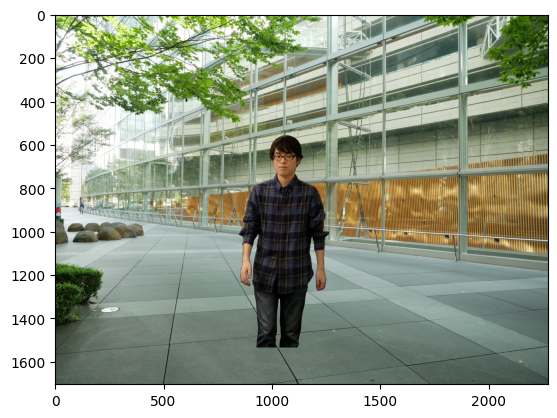

In [19]:
plot.imshow(background_img)

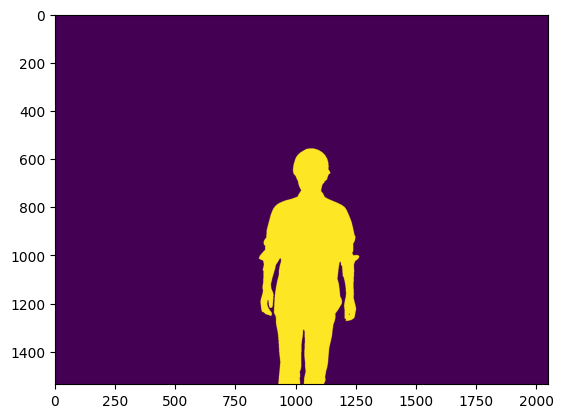

In [42]:
# check image size with open cv
import cv2

cv_mask = cv2.imread(mask_path)
cv_foreground = cv2.cvtColor(cv2.imread(foreground_path),cv2.COLOR_BGR2RGB)
cv_background = cv2.cvtColor(cv2.imread(background_path),cv2.COLOR_BGR2RGB)


red_channel = cv_mask[:,:,2] # width,height,channel
plot.imshow(cv_mask[:,:,2])

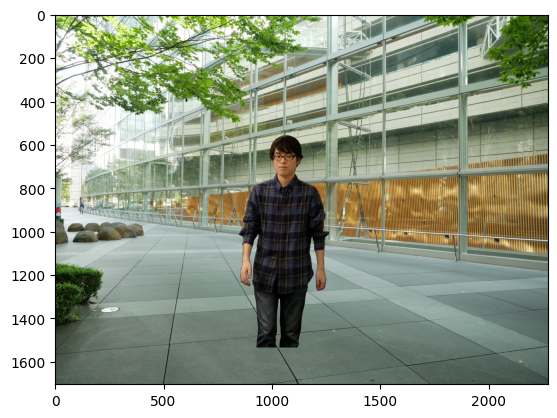

In [35]:
width,height = red_channel.shape

for i in range(width):
    for j in range(height):
        if red_channel[i,j] == 255:
            cv_background[i,j] = cv_foreground[i,j]

plot.imshow(cv_background)